In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!wget https://www.dropbox.com/s/2av4nr10v4m2vqi/TwoLeadECG_TRAIN?dl=0
!wget https://www.dropbox.com/s/6f9s6x6gp63l88p/TwoLeadECG_TEST?dl=0

--2020-01-31 08:09:49--  https://www.dropbox.com/s/2av4nr10v4m2vqi/TwoLeadECG_TRAIN?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2av4nr10v4m2vqi/TwoLeadECG_TRAIN [following]
--2020-01-31 08:09:49--  https://www.dropbox.com/s/raw/2av4nr10v4m2vqi/TwoLeadECG_TRAIN
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucefda65bf711570b4be7588634e.dl.dropboxusercontent.com/cd/0/inline/AxMwJH-IxnYGwWvsJQQcM25heTShX4BnxJKQhllLAaAf7JwGi7evbUWKEoD51jqNoorkj5MAUc8RWrq05hm-aceI22mL--H44WTQ4uCYHR23iya1P1tJ12FnUjeXQGm0TdY/file# [following]
--2020-01-31 08:09:49--  https://ucefda65bf711570b4be7588634e.dl.dropboxusercontent.com/cd/0/inline/AxMwJH-IxnYGwWvsJQQcM25heTShX4BnxJKQhllLAaAf7JwGi7evbUWKEoD51jqNoorkj5MAUc8RWrq05hm-aceI22mL--H44

In [0]:
!pip install dtw
import warnings
warnings.filterwarnings("ignore")

import dtw
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

  Created wheel for dtw: filename=dtw-1.4.0-cp36-none-any.whl size=5316 sha256=6658dba1920611789e760af2045d00c3632c7d51d85d8ba065cc9f429e411816
  Stored in directory: /root/.cache/pip/wheels/8c/8b/7a/947d67b53cd54948890a173527b0470ef56998812fc9d0a803
Successfully built dtw


In [0]:
def get_data(data_name):
    '''Importing data

    Parameter:
        data _name: 

    Return：
        train_series， train_series_labels， test_series， test_series_labels
    '''
    train = pd.read_csv(data_name + '_TRAIN?dl=0', header=None) 
    train = train.rename(columns={0:'Type'})   
    train = train.values[:, :]
    train_series = train[:, 1:]
    train_series_labels = train[:, 0]

    test = pd.read_csv(data_name + '_TEST?dl=0', header=None)
    test = test.rename(columns={0:'Type'}) 
    test = test.values[:, :]
    test_series = train[:, 1:]
    test_series_labels = train[:, 0]  
    
    return train_series, train_series_labels, test_series, test_series_labels

In [0]:
train_series, train_series_labels, test_series, test_series_labels = get_data('TwoLeadECG')

In [0]:
# One hot encoding

y_train1 = []
y_train2 = []
y_test1 = []
y_test2 = []

for train in train_series_labels:
    if train == 1:
        y_train1.append(1)
        y_train2.append(0)
    
    else:
        y_train1.append(0)
        y_train2.append(1)


for test in test_series_labels:
    if test == 1:
        y_test1.append(1)
        y_test2.append(0)
    
    else:
        y_test1.append(0)
        y_test2.append(1)

y_test = np.array([y_test1, y_test2]).transpose()
y_train = np.array([y_train1, y_train2]).transpose()

In [0]:
print(train_series[:20])
print('-----------------')
print(train_series.shape)

[[ 0.68835    0.61723    0.61723   ...  0.1431     0.16681    0.1431   ]
 [-0.11165   -0.036505  -0.074079  ...  0.063693   0.0010692 -0.011456 ]
 [-0.49172   -0.45549   -0.45549   ...  0.39585    0.41396    0.43208  ]
 ...
 [ 0.37854    0.37854    0.40218   ... -0.1652    -0.2834    -0.30704  ]
 [-0.13885   -0.11908   -0.059783  ...  0.11812    0.078586   0.078586 ]
 [ 0.12505    0.11151    0.11151   ...  0.35534    0.19279    0.1386   ]]
-----------------
(23, 82)


In [0]:
print(test_series[:20])
print('-----------------')
print(test_series.shape)

[[ 0.68835    0.61723    0.61723   ...  0.1431     0.16681    0.1431   ]
 [-0.11165   -0.036505  -0.074079  ...  0.063693   0.0010692 -0.011456 ]
 [-0.49172   -0.45549   -0.45549   ...  0.39585    0.41396    0.43208  ]
 ...
 [ 0.37854    0.37854    0.40218   ... -0.1652    -0.2834    -0.30704  ]
 [-0.13885   -0.11908   -0.059783  ...  0.11812    0.078586   0.078586 ]
 [ 0.12505    0.11151    0.11151   ...  0.35534    0.19279    0.1386   ]]
-----------------
(23, 82)


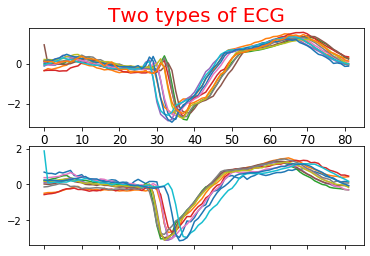

In [0]:
# Plot the time-series of the 2 categories

ecg_1 = []
ecg_2 = []

for type_ecg, ecg in zip(test_series_labels, train_series):
    if type_ecg==1:
        ecg_1.append(ecg)
    else:
        ecg_2.append(ecg)

ax1 = plt.subplot(211)
plt.title('Two types of ECG', size=20, color='r')

for graph in ecg_1:
    plt.plot(graph)

plt.setp(ax1.get_xticklabels(), fontsize=12)

ax2 = plt.subplot(212)

for graph in ecg_2:
    plt.plot(graph)

# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

plt.show()


# Baseline with KNN

In [0]:
# Creating our K-nearest neighbor metric for time-series

class K_nearest_neighbor():
    
    K = 1
    train_series = [] 
    train_series_labels = [] 
    dist_lambda = lambda x, y: np.abs(x - y) #L1 norm as the element comparison distance
    
    def __init__(self, train_series, train_series_labels, K=1,  dist_lambda=lambda x, y: np.abs(x - y)):
        
        self.K = K
        self.train_series = train_series
        self.train_series_labels = train_series_labels
        self.dist_lambda = dist_lambda
    
    
    def predict(self, test_series):
        
        predict_labels = [] 
        
        for test_series_signal in test_series:
            t_dis = []
            
            for train_series_signal in train_series:
                #DTW calculate sequence similarity
                dis, cost_matrix, acc_cost_matrix, path = dtw.accelerated_dtw(test_series_signal.reshape(-1,1),
                                                                              train_series_signal.reshape(-1,1),
                                                                              dist=self.dist_lambda)
                t_dis.append(dis)

            nearest_series_labels = np.array(train_series_labels[np.argsort(t_dis)[:self.K]]).astype(int)
    
            preditc_labels_signal = np.argmax(np.bincount(nearest_series_labels))
            predict_labels.append(preditc_labels_signal)
            
        return predict_labels

TwoLeadECG 1 0.9130434782608695
TwoLeadECG 2 0.9565217391304348
TwoLeadECG 3 0.9130434782608695
TwoLeadECG 4 0.9565217391304348
TwoLeadECG 5 0.782608695652174
TwoLeadECG 6 0.8260869565217391
TwoLeadECG 7 0.782608695652174
TwoLeadECG 8 0.782608695652174
TwoLeadECG 9 0.6956521739130435
-----------------------------------------------------


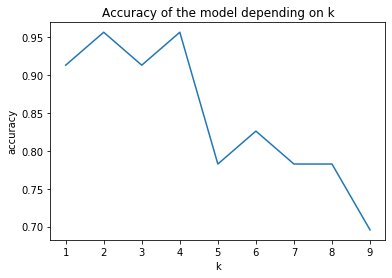

In [0]:
accuracies = [] 
train_series, train_series_labels, test_series, test_series_labels = get_data('TwoLeadECG') 

for k in range(1, 10):
    my_knn = K_nearest_neighbor(train_series=train_series, 
                                   train_series_labels=train_series_labels, 
                                   K=k)

    predict_labels = my_knn.predict(test_series)
        
    accuracy = np.mean(np.array(predict_labels) == test_series_labels)
    accuracies.append(accuracy)
    print('TwoLeadECG', k, accuracy)

print("-----------------------------------------------------")

plt.plot([k for k in range(1, 10)], accuracies)
plt.title('Accuracy of the model depending on k')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()

# LSTM-FCN model

In [0]:
from keras import backend as K
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout, Flatten
from keras.layers import Input, PReLU, Dense, LSTM, CuDNNLSTM, concatenate, Activation, GRU, SimpleRNN
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
def generate_lstmfcn(MAX_SEQUENCE_LENGTH=82, NB_CLASS=2, NUM_CELLS=8):

    ip = Input(shape=(1, MAX_SEQUENCE_LENGTH)) # tensor

    x = LSTM(NUM_CELLS)(ip)
    x = Dropout(0.8)(x)

    y = Permute((2, 1))(ip) # permutes the first and second dimension of the input (connecting RNNs and convnets together)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y) # for temporal convolution
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)
    x = concatenate([x, y])

    out = Dense(NB_CLASS, activation='softmax')(x)

    model = Model(ip, out)
    model.summary()

    return model

In [0]:
model = generate_lstmfcn()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 82)        0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 82, 1)        0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 82, 128)      1152        permute_1[0][0]                  
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 82, 128)      512         conv1d_

In [0]:
# Create the tensors
X_train = np.reshape(train_series, (train_series.shape[0], 1, train_series.shape[1]))
X_test = np.reshape(test_series, (test_series.shape[0], 1, test_series.shape[1]))

adam = Adam(lr=1e-3)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='auto', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=128, callbacks=[chk],
          validation_data=(X_test,y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 23 samples, validate on 23 samples
Epoch 1/50





23/23 [==============================] - 16s 699ms/step - loss: 0.9303 - acc: 0.5217 - val_loss: 0.9382 - val_acc: 0.5217

Epoch 00001: val_acc improved from -inf to 0.52174, saving model to best_model.pkl
Epoch 2/50
23/23 [==============================] - 0s 951us/step - loss: 0.7192 - acc: 0.5217 - val_loss: 0.8665 - val_acc: 0.5217

Epoch 00002: val_acc did not improve from 0.52174
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 0.6205 - acc: 0.6087 - val_loss: 0.8219 - val_acc: 0.5217

Epoch 00003: val_acc did not improve from 0.52174
Epoch 4/50
23/23 [==============================] - 0s 904us/step - loss: 0.5724 - acc: 0.8261 - val_loss: 0.8125 - val_acc: 0.5217

Epoch 00004: val_acc did not improve from 0.52174
Epoch 5/50
23/23 [==============================] - 0s 767us/step - loss: 0.5280 - acc: 

In [0]:
#loading the model and checking accuracy on the test data

model = load_model('best_model.pkl')

from sklearn.metrics import accuracy_score
test_preds = [np.argmax(i) for i in model.predict(X_test)]
y_test_res = [np.argmax(i) for i in y_test]
test_accuracy = 100*np.sum(np.array(test_preds)==y_test_res)/len(test_preds)
print('Accuracy of the model on test set:', test_accuracy)

Accuracy of the model on test set: 100.0


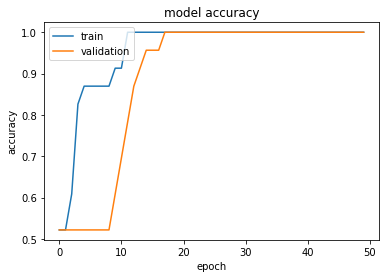

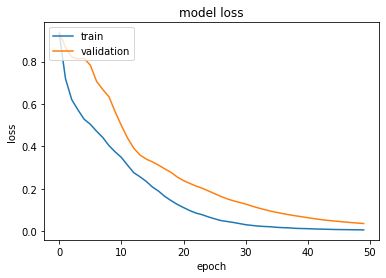

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()